In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images/255
test_images = test_images/255
#train_images = train_images.reshape((train_images.shape[0], 3072))
x_test_nonreshape = train_images
#test_images = test_images.reshape((test_images.shape[0], 3072))

In [3]:
print(train_images[0],train_labels[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


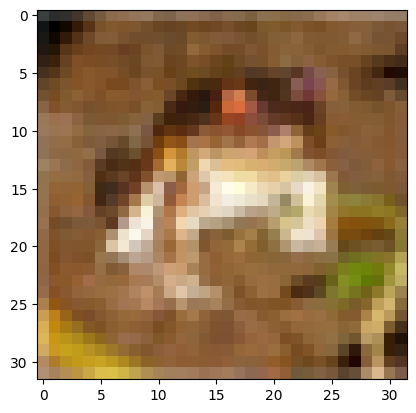

In [4]:
plt.imshow(train_images[0],cmap=plt.cm.binary)

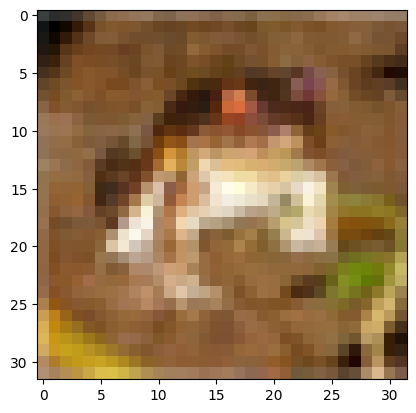

In [5]:
plt.imshow(train_images[0],cmap=plt.cm.binary)

In [6]:
tf.size(train_images[0])

<tf.Tensor: shape=(), dtype=int32, numpy=3072>

In [7]:
model = models.Sequential()


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

In [9]:
model.add(layers.Dense(10))

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9089 - accuracy: 0.3103 - val_loss: 1.7541 - val_accuracy: 0.3754
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7637 - accuracy: 0.3710 - val_loss: 1.7376 - val_accuracy: 0.3867
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7180 - accuracy: 0.3888 - val_loss: 1.6791 - val_accuracy: 0.4043
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6848 - accuracy: 0.4003 - val_loss: 1.6517 - val_accuracy: 0.4152
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6545 - accuracy: 0.4101 - val_loss: 1.6517 - val_accuracy: 0.4117
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6346 - accuracy: 0.4203 - val_loss: 1.6559 - val_accuracy: 0.4177
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6173 - accuracy: 0.4229 - val_loss: 1.6183 - val_accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.6186 - accuracy: 0.4211 - 815ms/epoch - 3ms/step


In [12]:
print(test_acc)

0.421099990606308


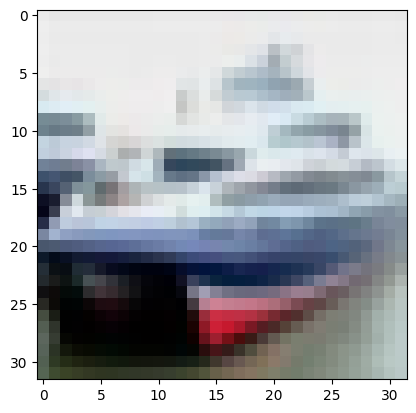

In [13]:
plt.imshow(test_images[1],cmap=plt.cm.binary)
plt.show()

In [14]:
predict=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
predict

array([[-0.648597  , -1.7061865 , -0.02619007, ..., -4.092111  ,
        -0.08242816, -4.467418  ],
       [ 0.6303255 ,  0.14696255, -3.6308556 , ..., -4.045748  ,
         2.650086  ,  2.4474237 ],
       [ 0.3032635 , -0.6580576 , -3.835239  , ..., -4.6642847 ,
         2.9747148 , -0.05698324],
       ...,
       [-2.2778242 , -2.6519122 , -0.71767676, ..., -0.2428194 ,
        -1.5023117 , -2.3747618 ],
       [-2.3991475 , -2.6749222 , -1.3306674 , ..., -2.0719826 ,
        -1.9435041 , -2.1290462 ],
       [-0.78236294, -3.016054  , -0.2377077 , ...,  0.7713173 ,
        -1.7971412 , -1.8725842 ]], dtype=float32)

In [16]:
import numpy as np

print(np.argmax(predict[1]))

8


In [17]:
predict[1]

array([ 0.6303255 ,  0.14696255, -3.6308556 , -4.2671866 , -3.428803  ,
       -4.633686  , -6.7420683 , -4.045748  ,  2.650086  ,  2.4474237 ],
      dtype=float32)

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']               

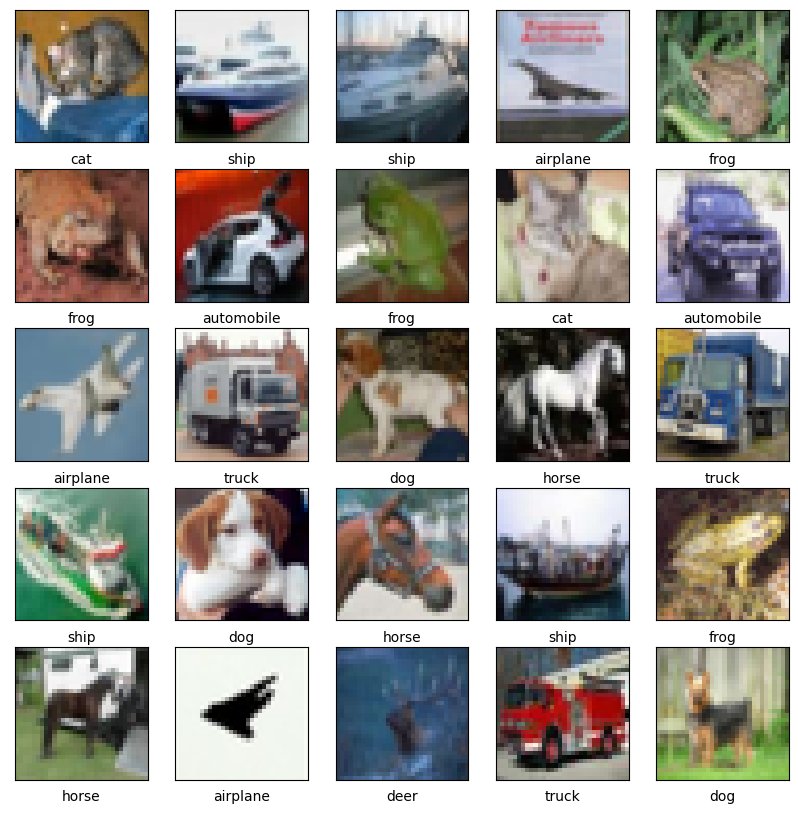

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [20]:
print(np.argmax(predict[3]))

8


In [21]:
print(np.argmax(predict[6]))

3


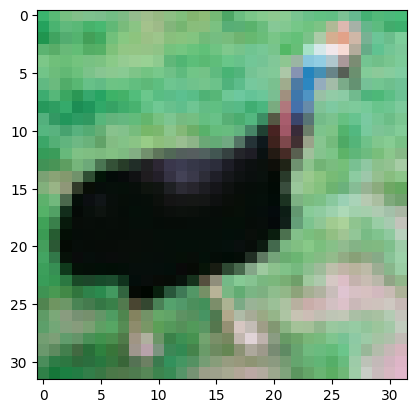

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 4 


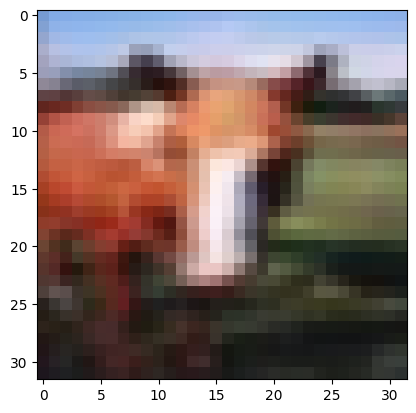

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 9 


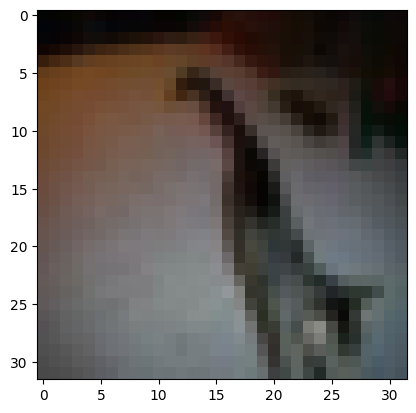

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 5 


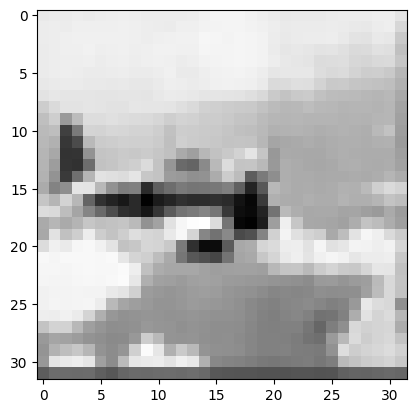

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 8 


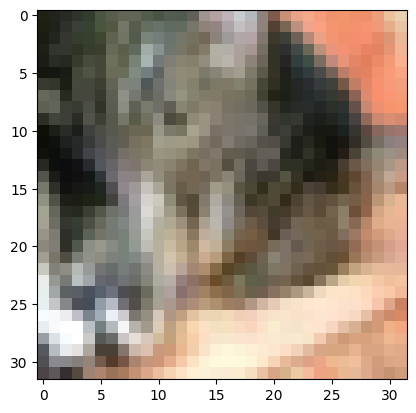

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 7 


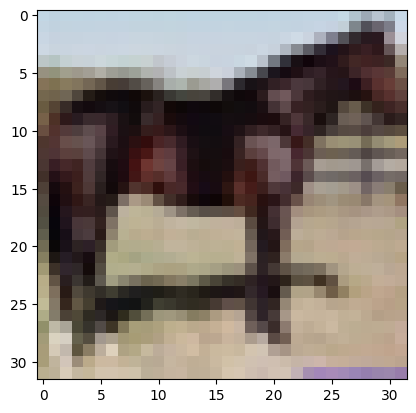

1563/1563 [==============================] - 4s 3ms/step
Predicted Value is: 7 


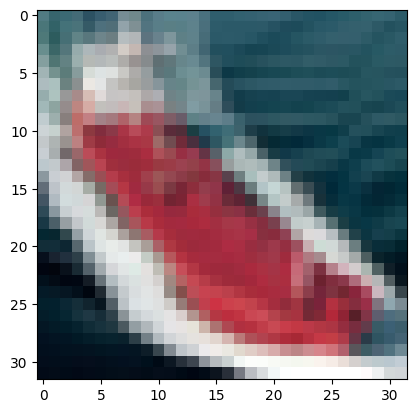

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 8 


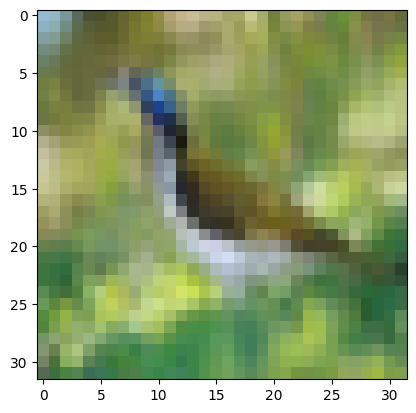

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 4 


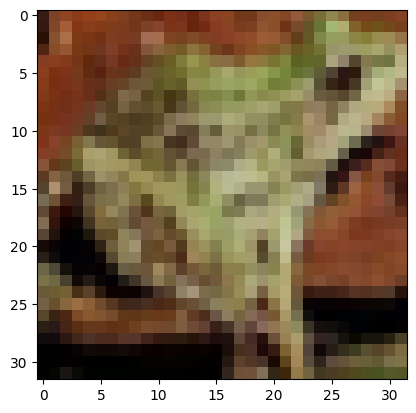

1563/1563 [==============================] - 3s 2ms/step
Predicted Value is: 6 


In [22]:
import random
for i in range(1, 10):
  n = random.randint(0,1000)
  plt.imshow(x_test_nonreshape[n])
  plt.show()
  predicted_value = model.predict(train_images)
#   t = np.argmax(predicted_value[n])
#   print(f'Predicted Value is: {class_names[t]} ')
  print(f'Predicted Value is: {np.argmax(predicted_value[n])} ')

10
10


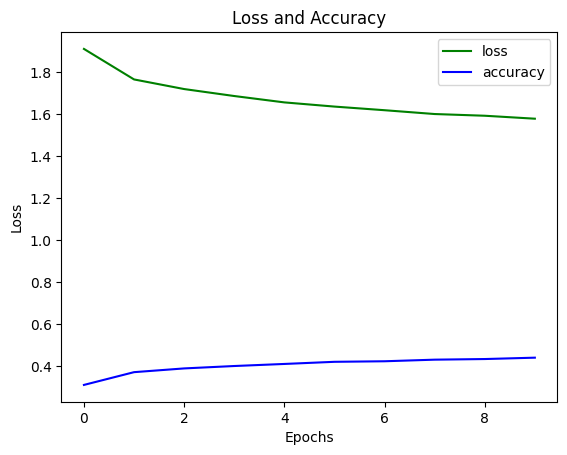

In [23]:
loss = history.history['loss']
print(len(loss))
accuracy = history.history['accuracy']
print(len(accuracy))
epochs = range(10)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, accuracy, 'b', label='accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Youtube Link: https://www.youtube.com/watch?v=NZqZMBo12cg